In [28]:
import torch 
import torchvision 
from torchvision import transforms as tf 

import torch.nn as nn 
import torch.nn.functional as F

from tqdm import tqdm 
import time

import cv2 as cv

In [29]:
tf = tf.Compose([
    tf.ToTensor(),
    tf.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))
])#封装了两个方法
'''
Normalize对每个通道执行以下操作：image =（图像-平均值）/ std在您的情况下，参数mean，std分别以0.5和0.5的形式传递。这将使图像在[-1,1]范围内归一化。
精确值是通过分别计算R,G,B三个通道的数据算出来的，
比如你有2张图片，都是100100大小的，那么两图片的像素点共有2100*100 = 20 000 个； 那么这两张图片的
1. mean求法：
mean_R: 这20000个像素点的R值加起来，除以像素点的总数，这里是20000；mean_G 和mean_B 两个通道 的计算方法 一样的。

2. 标准差求法：
首先标准差就是开了方的方差，所以其实就是求方差，方差公式就是我们数学上的那个求方差的公式：

也是3个通道分开算，
比如算R通道的， 这里X就为20000个像素点 各自的R值，再减去R均值，上面已经算好了；
然后平方；
然后20000个像素点相加，然后求平均除以20000，
得到R的方差，再开方得标准差。
'''
batch = 4

dataset = torchvision.datasets.CIFAR10(root='../data',train=True,download = False,transform=tf)
dataloader = torch.utils.data.DataLoader(dataset,batch_size = batch,shuffle = True,num_workers = 2)
testset = torchvision.datasets.CIFAR10(root='../data',train = False,download = False,transform=tf)
testloader = torch.utils.data.DataLoader(testset,batch_size = batch,shuffle = True,num_workers = 2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')



In [32]:
class Module(nn.Module):
    def __init__(self):
        super(Module,self).__init__()
        self.conv1 = nn.Conv2d(3,6,5)#in:3 out:6 kernal:5 -> h=w=28
        self.pool = nn.MaxPool2d(2,2)
        self.conv2 = nn.Conv2d(6,16,5)#h=w=24
        self.fc1 = nn.Linear(16* 5*5 ,120)
        self.fc2 = nn.Linear(120,84)
        self.fc3 = nn.Linear(84,10)
        
    def forward(self,x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1,16*5*5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [35]:
epoch = 3
lr = 0.001
momentum = 0.9

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device="cpu"

print(device)
module = Module()
module.to(device)
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(y.parameters(),lr=lr,momentum=momentum)

cpu


In [36]:
start = time.time()


run_loss = 0.0
for n in range(epoch):
    for i,data in tqdm(enumerate(dataloader,0)):
        inputs,labels = data 
        inputs,labels = inputs.to(device),labels.to(device)
        
        
        optimizer.zero_grad()

        outputs = module(inputs)
        
        loss = loss_fn(outputs,labels)
        
        loss.backward()
        optimizer.step()
        
        run_loss+=loss.item()
        if i%2000==1999:
            print(n,run_loss)
            run_loss = 0.0
            
print('Finished Training! Total cost time: ', time.time()-start)
        
    

0it [00:00, ?it/s]Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f5f3e7821f0>
Traceback (most recent call last):
  File "/home/asus/anaconda3/envs/learnPy/lib/python3.8/site-packages/torch/utils/data/dataloader.py", line 1203, in __del__
Exception ignored in:     self._shutdown_workers()<function _MultiProcessingDataLoaderIter.__del__ at 0x7f5f3e7821f0>

Traceback (most recent call last):
  File "/home/asus/anaconda3/envs/learnPy/lib/python3.8/site-packages/torch/utils/data/dataloader.py", line 1177, in _shutdown_workers
  File "/home/asus/anaconda3/envs/learnPy/lib/python3.8/site-packages/torch/utils/data/dataloader.py", line 1203, in __del__
        w.join(timeout=_utils.MP_STATUS_CHECK_INTERVAL)self._shutdown_workers()
  File "/home/asus/anaconda3/envs/learnPy/lib/python3.8/multiprocessing/process.py", line 147, in join

      File "/home/asus/anaconda3/envs/learnPy/lib/python3.8/site-packages/torch/utils/data/dataloader.py", line 1177, in _shutdown_wor

0 4611.290206670761


4033it [00:14, 281.44it/s]

0 4609.2317225933075


6038it [00:21, 292.61it/s]

0 4611.35280919075


8027it [00:29, 220.07it/s]

0 4610.58375453949


10045it [00:36, 297.11it/s]

0 4612.337443828583


12033it [00:44, 269.52it/s]

0 4606.435357570648


12500it [00:45, 272.30it/s]
2059it [00:07, 301.29it/s]

1 5762.679310321808


4034it [00:14, 291.04it/s]

1 4609.670459985733


6050it [00:21, 277.50it/s]

1 4610.492131948471


8025it [00:28, 302.95it/s]

1 4606.16822719574


10037it [00:36, 281.32it/s]

1 4612.476841688156


12016it [00:43, 230.71it/s]

1 4610.653682231903


12500it [00:45, 276.26it/s]
0it [00:00, ?it/s]Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f5f3e7821f0>
Traceback (most recent call last):
  File "/home/asus/anaconda3/envs/learnPy/lib/python3.8/site-packages/torch/utils/data/dataloader.py", line 1203, in __del__
    self._shutdown_workers()
  File "/home/asus/anaconda3/envs/learnPy/lib/python3.8/site-packages/torch/utils/data/dataloader.py", line 1177, in _shutdown_workers
    w.join(timeout=_utils.MP_STATUS_CHECK_INTERVAL)
Exception ignored in:   File "/home/asus/anaconda3/envs/learnPy/lib/python3.8/multiprocessing/process.py", line 147, in join
<function _MultiProcessingDataLoaderIter.__del__ at 0x7f5f3e7821f0>    
assert self._parent_pid == os.getpid(), 'can only join a child process'
Traceback (most recent call last):
AssertionError  File "/home/asus/anaconda3/envs/learnPy/lib/python3.8/site-packages/torch/utils/data/dataloader.py", line 1203, in __del__
:     can only join a child processself._shut

2 5764.624840259552


4055it [00:14, 302.95it/s]

2 4609.659725427628


4472it [00:16, 272.31it/s]


KeyboardInterrupt: 

In [37]:
import matplotlib.pyplot as plt
import numpy as np

# 展示图片的函数
def imshow(img):
    img = img / 2 + 0.5     # 非归一化
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f5f3e7821f0>
Traceback (most recent call last):
  File "/home/asus/anaconda3/envs/learnPy/lib/python3.8/site-packages/torch/utils/data/dataloader.py", line 1203, in __del__
    Exception ignored in: self._shutdown_workers()
  File "/home/asus/anaconda3/envs/learnPy/lib/python3.8/site-packages/torch/utils/data/dataloader.py", line 1177, in _shutdown_workers
    w.join(timeout=_utils.MP_STATUS_CHECK_INTERVAL)
  File "/home/asus/anaconda3/envs/learnPy/lib/python3.8/multiprocessing/process.py", line 147, in join
    assert self._parent_pid == os.getpid(), 'can only join a child process'
AssertionError: can only join a child process
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f5f3e7821f0>
Traceback (most recent call last):
  File "/home/asus/anaconda3/envs/learnPy/lib/python3.8/site-packages/torch/utils/data/dataloader.py", line 1203, in __del__
    self._shutdown_workers()
  File "

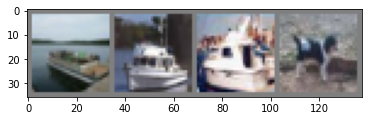

GroundTruth:   ship  ship  ship   dog


In [38]:
dataiter = iter(testloader)
images, labels = dataiter.next()

# 打印图片
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [43]:

outputs = module(images)
_,pred = torch.max(outputs,1)
print('Predicted: ', ' '.join('%5s' % classes[pred[j]] for j in range(4)))

Predicted:  truck truck truck   dog


tensor([0.0753, 0.0762, 0.0760, 0.0760], grad_fn=<MaxBackward0>)

In [48]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = module(images)
        _, pred = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (pred == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (100 * correct / total))

Accuracy of the network on the 10000 test images: 9 %


In [46]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = module(images)
        _, pred = torch.max(outputs.data, 1)
        c = (pred == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1

for i in range(10):
    print('Accuracy of %5s : %2d %%' % (classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane :  0 %
Accuracy of   car :  0 %
Accuracy of  bird :  0 %
Accuracy of   cat :  0 %
Accuracy of  deer :  0 %
Accuracy of   dog : 33 %
Accuracy of  frog :  0 %
Accuracy of horse :  0 %
Accuracy of  ship :  3 %
Accuracy of truck : 58 %
